# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#7b6b59;overflow:hidden">TRAIN MODEL NAIVE BAYES</div>


In [1]:
# Import library needed
import os
import pickle
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from time import sleep


# Function
def save_pkl(obj: any, name: str):
    """Saves an object to a pickle file, ensuring proper file extension and security.

    Args:
        obj: The object to serialize and save.
        name (str): The desired filename or path.
            - If it doesn't end with ".pkl", `.pkl` will be appended.
            - Supports relative and absolute paths.
        protocol (int, optional): The pickle protocol version to use. Defaults to the
            highest compatible with the current Python version.

    Raises:
        ValueError: If `name` is an empty string or if file operations fail.
        PickleError: If pickling encounters an error.
    """

    
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    if not name.endswith(".pkl"):
        name += ".pkl"

    try:
        with open(name, 'wb') as file:
            pickle.dump(obj, file)
    except (OSError, IOError) as e:
        raise ValueError(f"Failed to save pickle file: {e}") from e
    except pickle.PickleError as e:
        raise pickle.PickleError(f"Pickling error: {e}") from e

    print(f"Saved: \"{name}\"")

def load_pkl(name: str):
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    with open(name, 'rb') as file:
        return pickle.load(file)

def model_information(model, X_test, y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Overall accuracy model:")
    print(f"Accuracy  = {accuracy*100:<.2f}%")
    print(f"Precision = {precision*100:<.2f}%")
    print(f"Recall    = {recall*100:<.2f}%")
    print(f"F1-score  = {f1*100:<.2f}%\n")
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    heatmap = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    labels = np.unique(y_test)

    print("Accuracy model for each label:")
    for label in labels:
        idx = np.where(model.classes_ == label)[0][0]
        label_accuracy = cm[idx, idx] / np.sum(cm[idx, :])
        print(f"{label:<14s}= {label_accuracy*100:.2f}%")

    heatmap.plot()
    plt.show()


In [2]:
# Read dataset
df = pd.read_csv('imo.csv')


In [3]:
df_notna = df[df["label"].notna()]
df_notna.reset_index(drop=True, inplace=True)

print(f"{df_notna.shape}\n")

number_of_occurrences = [
    df_notna[df_notna['label'] == 'Algebra'].shape[0],
    df_notna[df_notna['label'] == 'Combinatorics'].shape[0],
    df_notna[df_notna['label'] == 'Geometry'].shape[0],
    df_notna[df_notna['label'] == 'Number Theory'].shape[0]
]
print(f"Algebra       = {number_of_occurrences[0]}")
print(f"Combinatorics = {number_of_occurrences[1]}")
print(f"Geometry      = {number_of_occurrences[2]}")
print(f"Number Theory = {number_of_occurrences[3]}")


(3224, 10)

Algebra       = 726
Combinatorics = 630
Geometry      = 1164
Number Theory = 704


Overall accuracy model:
Accuracy  = 89.53%
Precision = 89.55%
Recall    = 89.53%
F1-score  = 89.46%

Accuracy model for each label:
Algebra       = 89.73%
Combinatorics = 82.96%
Geometry      = 98.30%
Number Theory = 84.44%


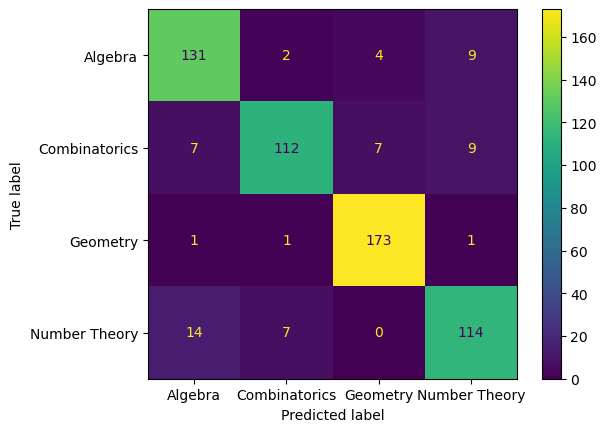

Saved: "NB_90_accuracy/NB_.pkl"
Saved: "NB_90_accuracy/vectorizer.pkl"
Saved: "NB_90_accuracy/X_train.pkl"
Saved: "NB_90_accuracy/X_test.pkl"
Saved: "NB_90_accuracy/y_train.pkl"
Saved: "NB_90_accuracy/y_test.pkl"


In [4]:
# Kurangi soal geometry
aa = df_notna[df_notna['label'] == "Algebra"].sample(726)
cc = df_notna[df_notna['label'] == "Combinatorics"].sample(630)
gg = df_notna[df_notna['label'] == "Geometry"].sample(900)
nt = df_notna[df_notna['label'] == "Number Theory"].sample(704)
data = pd.concat([aa, cc, gg, nt], axis=0)

# Split
X, y = data["post_canonical"], data["label"]

# Preprocess text data (Representation text to numeric)
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(X)

# Split training and test 
X_train, X_test, y_train, y_test = train_test_split(text_features, y, test_size=0.2, random_state=62)

# Train the Naive Bayes model with train dataset
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
model_information(model, X_test, y_test)


# Save model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
directory = f"NB_{round(accuracy*100)}_accuracy"
os.makedirs(directory, exist_ok=True); sleep(1);

save_pkl(model, f"{directory}/NB_.pkl")
save_pkl(vectorizer, f"{directory}/vectorizer.pkl")

X.to_csv(f"{directory}/X.csv", index=False)
y.to_csv(f"{directory}/y.csv", index=False)

save_pkl(X_train, f"{directory}/X_train.pkl")
save_pkl(X_test, f"{directory}/X_test.pkl")
save_pkl(y_train, f"{directory}/y_train.pkl")
save_pkl(y_test, f"{directory}/y_test.pkl")
